In [1]:
import pandas as pd
import os

# Specify the directory path where the Excel files are located
directory_path = 'D:\merged_padelpy_data'  # Replace with the actual directory path

# Get a list of Excel files in the specified directory
csv_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

# Loop through the Excel files and concatenate them
for file in csv_files:
    df = pd.read_csv(file)  # Read each Excel file
    concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

# Now, 'concatenated_df' contains the combined data from all Excel files in the specified directory.

# You can further process or save the concatenated DataFrame as needed.


In [2]:
concatenated_df

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,TDB2m.1,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1
0,HCC2218,SIDM00772,Breast,Breast Carcinoma,AZD7762,"CHEK1, CHEK2",Cell cycle,0.25000,AZD6482,PI3Kbeta,...,200.540557,491.798498,14.141762,200.540557,49.263751,918.809671,650.280663,30.411126,313.957952,5.424050
1,EVSA-T,SIDM01042,Breast,Breast Carcinoma,Docetaxel,Microtubule stabiliser,Mitosis,0.00025,Pictilisib,PI3K (class 1),...,235.929242,495.517260,15.839972,235.929242,52.699492,919.724409,656.503064,30.375314,353.089897,5.847010
2,DU-4475,SIDM01001,Breast,Breast Carcinoma,5-Fluorouracil,Antimetabolite (DNA & RNA),Other,10.00000,BI-2536,"PLK1, PLK2, PLK3",...,167.463013,485.886555,15.454071,167.463013,48.526990,834.594744,562.029377,29.342802,281.217665,4.901308
3,AU565,SIDM00898,Breast,Breast Carcinoma,MK-1775,"WEE1, PLK1",Cell cycle,2.50000,Venetoclax,BCL2,...,224.593531,493.237488,14.593571,224.593531,50.595364,959.529591,675.772023,31.365207,367.583065,5.573865
4,MDA-MB-175-VII,SIDM00633,Breast,Breast Carcinoma,Navitoclax,"BCL2, BCL-XL, BCL-W",Apoptosis regulation,0.62500,Luminespib,HSP90,...,178.310056,473.819605,14.871784,178.310056,50.503722,904.256139,627.653184,29.590188,305.014273,5.264898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153607,JIMT-1,SIDM01037,Breast,Breast Carcinoma,Crizotinib,"MET, ALK, ROS1",RTK signaling,2.50000,Bortezomib,Proteasome,...,178.125094,483.713268,13.648716,178.125094,48.981347,856.785019,558.411682,29.080936,316.854658,4.640307
153608,OCUB-M,SIDM00241,Breast,Breast Carcinoma,Sapitinib,"EGFR, ERBB2, ERBB3",EGFR signaling,2.00000,Camptothecin,TOP1,...,231.484130,476.229825,13.709655,231.484130,56.537798,1039.054406,767.633551,32.516187,370.086350,5.881938
153609,Hs-578-T,SIDM00135,Breast,Breast Carcinoma,Olaparib,"PARP1, PARP2",Genome integrity,2.50000,Temozolomide,DNA alkylating agent,...,278.898124,526.511035,11.360753,278.898124,55.352802,866.291504,751.130750,36.065517,366.023527,4.791210
153610,HCC1937,SIDM00874,Breast,Breast Carcinoma,Linsitinib,IGF1R,IGF1R signaling,10.00000,5-Fluorouracil,Antimetabolite (DNA & RNA),...,304.374607,554.372817,9.718701,304.374607,0.000000,538.402068,578.287232,40.052447,573.483382,3.048730


In [12]:
import pandas as pd

def calculate_combination_stats(concatenated_df):
    # Count the number of unique drug combinations
    unique_combinations_count = concatenated_df.groupby(['Anchor Name', 'Library Name']).size().count()

    # Calculate the number of entries in each combination
    entries_per_combination = concatenated_df.groupby(['Anchor Name', 'Library Name']).size().reset_index(name='EntryCount')

    # Print the results
    print(f"Number of Unique Drug Combinations: {unique_combinations_count}")
    print("Number of Entries in Each Combination:")
    print(entries_per_combination)

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Drug_Combination': entries_per_combination.apply(lambda x: f"{x['Anchor Name']} - {x['Library Name']}", axis=1),
        'EntryCount': entries_per_combination['EntryCount']
    })

    # Save the results to a CSV file (replace 'results.csv' with your desired filename)
    results_df.to_csv('results.csv', index=False)

# Call the function to calculate and print combination statistics
calculate_combination_stats(concatenated_df)
# The rest of your code follows here...


Number of Unique Drug Combinations: 1200
Number of Entries in Each Combination:
         Anchor Name    Library Name  EntryCount
0     5-Fluorouracil         AZD6482         106
1     5-Fluorouracil         AZD7762         136
2     5-Fluorouracil         AZD8055         122
3     5-Fluorouracil        Afatinib         142
4     5-Fluorouracil       Alisertib         112
...              ...             ...         ...
1195      Vorinostat      Trametinib         134
1196      Vorinostat      Uprosertib         106
1197      Vorinostat      Venetoclax         100
1198      Vorinostat  Wee1 Inhibitor         108
1199      Vorinostat        ZM447439         112

[1200 rows x 3 columns]


In [3]:
has_negative_values = (concatenated_df['Library IC50']<0).any()
if has_negative_values:
    print('presence')
else:
    print('absent')

presence


In [4]:
import pandas as pd

# Assuming you have a DataFrame named 'concatenated_df'
negative_ic50_mask = concatenated_df['Library IC50'] < 0
concatenated_df.loc[negative_ic50_mask, 'Library IC50'] = -concatenated_df.loc[negative_ic50_mask, 'Library IC50']


In [5]:
has_negative_values = (concatenated_df['Library IC50']<0).any()
if has_negative_values:
    print('presence')
else:
    print('absent')

absent


In [6]:
import pandas as pd

# Assuming you have a DataFrame named 'concatenated_df'
negative_ic50_mask = concatenated_df['Combo IC50'] < 0
concatenated_df.loc[negative_ic50_mask, 'Combo IC50'] = -concatenated_df.loc[negative_ic50_mask, 'Combo IC50']


In [7]:
has_negative_values = (concatenated_df['Combo IC50']<0).any()
if has_negative_values:
    print('presence')
else:
    print('absent')

absent


In [8]:
concatenated_df

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,TDB2m.1,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1
0,HCC2218,SIDM00772,Breast,Breast Carcinoma,AZD7762,"CHEK1, CHEK2",Cell cycle,0.25000,AZD6482,PI3Kbeta,...,200.540557,491.798498,14.141762,200.540557,49.263751,918.809671,650.280663,30.411126,313.957952,5.424050
1,EVSA-T,SIDM01042,Breast,Breast Carcinoma,Docetaxel,Microtubule stabiliser,Mitosis,0.00025,Pictilisib,PI3K (class 1),...,235.929242,495.517260,15.839972,235.929242,52.699492,919.724409,656.503064,30.375314,353.089897,5.847010
2,DU-4475,SIDM01001,Breast,Breast Carcinoma,5-Fluorouracil,Antimetabolite (DNA & RNA),Other,10.00000,BI-2536,"PLK1, PLK2, PLK3",...,167.463013,485.886555,15.454071,167.463013,48.526990,834.594744,562.029377,29.342802,281.217665,4.901308
3,AU565,SIDM00898,Breast,Breast Carcinoma,MK-1775,"WEE1, PLK1",Cell cycle,2.50000,Venetoclax,BCL2,...,224.593531,493.237488,14.593571,224.593531,50.595364,959.529591,675.772023,31.365207,367.583065,5.573865
4,MDA-MB-175-VII,SIDM00633,Breast,Breast Carcinoma,Navitoclax,"BCL2, BCL-XL, BCL-W",Apoptosis regulation,0.62500,Luminespib,HSP90,...,178.310056,473.819605,14.871784,178.310056,50.503722,904.256139,627.653184,29.590188,305.014273,5.264898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153607,JIMT-1,SIDM01037,Breast,Breast Carcinoma,Crizotinib,"MET, ALK, ROS1",RTK signaling,2.50000,Bortezomib,Proteasome,...,178.125094,483.713268,13.648716,178.125094,48.981347,856.785019,558.411682,29.080936,316.854658,4.640307
153608,OCUB-M,SIDM00241,Breast,Breast Carcinoma,Sapitinib,"EGFR, ERBB2, ERBB3",EGFR signaling,2.00000,Camptothecin,TOP1,...,231.484130,476.229825,13.709655,231.484130,56.537798,1039.054406,767.633551,32.516187,370.086350,5.881938
153609,Hs-578-T,SIDM00135,Breast,Breast Carcinoma,Olaparib,"PARP1, PARP2",Genome integrity,2.50000,Temozolomide,DNA alkylating agent,...,278.898124,526.511035,11.360753,278.898124,55.352802,866.291504,751.130750,36.065517,366.023527,4.791210
153610,HCC1937,SIDM00874,Breast,Breast Carcinoma,Linsitinib,IGF1R,IGF1R signaling,10.00000,5-Fluorouracil,Antimetabolite (DNA & RNA),...,304.374607,554.372817,9.718701,304.374607,0.000000,538.402068,578.287232,40.052447,573.483382,3.048730


In [9]:
from MultiColumnLabelEncoder import MultiColumnLabelEncoder
Mcle = MultiColumnLabelEncoder()


In [10]:
X = concatenated_df.drop('Library IC50', axis = 1)
X

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,TDB2m.1,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1
0,HCC2218,SIDM00772,Breast,Breast Carcinoma,AZD7762,"CHEK1, CHEK2",Cell cycle,0.25000,AZD6482,PI3Kbeta,...,200.540557,491.798498,14.141762,200.540557,49.263751,918.809671,650.280663,30.411126,313.957952,5.424050
1,EVSA-T,SIDM01042,Breast,Breast Carcinoma,Docetaxel,Microtubule stabiliser,Mitosis,0.00025,Pictilisib,PI3K (class 1),...,235.929242,495.517260,15.839972,235.929242,52.699492,919.724409,656.503064,30.375314,353.089897,5.847010
2,DU-4475,SIDM01001,Breast,Breast Carcinoma,5-Fluorouracil,Antimetabolite (DNA & RNA),Other,10.00000,BI-2536,"PLK1, PLK2, PLK3",...,167.463013,485.886555,15.454071,167.463013,48.526990,834.594744,562.029377,29.342802,281.217665,4.901308
3,AU565,SIDM00898,Breast,Breast Carcinoma,MK-1775,"WEE1, PLK1",Cell cycle,2.50000,Venetoclax,BCL2,...,224.593531,493.237488,14.593571,224.593531,50.595364,959.529591,675.772023,31.365207,367.583065,5.573865
4,MDA-MB-175-VII,SIDM00633,Breast,Breast Carcinoma,Navitoclax,"BCL2, BCL-XL, BCL-W",Apoptosis regulation,0.62500,Luminespib,HSP90,...,178.310056,473.819605,14.871784,178.310056,50.503722,904.256139,627.653184,29.590188,305.014273,5.264898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153607,JIMT-1,SIDM01037,Breast,Breast Carcinoma,Crizotinib,"MET, ALK, ROS1",RTK signaling,2.50000,Bortezomib,Proteasome,...,178.125094,483.713268,13.648716,178.125094,48.981347,856.785019,558.411682,29.080936,316.854658,4.640307
153608,OCUB-M,SIDM00241,Breast,Breast Carcinoma,Sapitinib,"EGFR, ERBB2, ERBB3",EGFR signaling,2.00000,Camptothecin,TOP1,...,231.484130,476.229825,13.709655,231.484130,56.537798,1039.054406,767.633551,32.516187,370.086350,5.881938
153609,Hs-578-T,SIDM00135,Breast,Breast Carcinoma,Olaparib,"PARP1, PARP2",Genome integrity,2.50000,Temozolomide,DNA alkylating agent,...,278.898124,526.511035,11.360753,278.898124,55.352802,866.291504,751.130750,36.065517,366.023527,4.791210
153610,HCC1937,SIDM00874,Breast,Breast Carcinoma,Linsitinib,IGF1R,IGF1R signaling,10.00000,5-Fluorouracil,Antimetabolite (DNA & RNA),...,304.374607,554.372817,9.718701,304.374607,0.000000,538.402068,578.287232,40.052447,573.483382,3.048730


In [11]:
Y = concatenated_df['Library IC50']
Y = pd.DataFrame(Y)
Y

,Library IC50
0,17.710236
1,6.045908
2,1.190284
3,14.550839
4,8.548526
...,...
153607,6.781239
153608,9.535721
153609,14.236143
153610,12.924242


In [17]:
enc_df = Mcle.fit_transform(X)
enc_df

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,TDB2m.1,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1
0,0,0,0,0,0,0,0,0.25000,0,0,...,200.540557,491.798498,14.141762,200.540557,49.263751,918.809671,650.280663,30.411126,313.957952,5.424050
1,1,1,0,0,1,1,1,0.00025,1,1,...,235.929242,495.517260,15.839972,235.929242,52.699492,919.724409,656.503064,30.375314,353.089897,5.847010
2,2,2,0,0,2,2,2,10.00000,2,2,...,167.463013,485.886555,15.454071,167.463013,48.526990,834.594744,562.029377,29.342802,281.217665,4.901308
3,3,3,0,0,3,3,0,2.50000,3,3,...,224.593531,493.237488,14.593571,224.593531,50.595364,959.529591,675.772023,31.365207,367.583065,5.573865
4,4,4,0,0,4,4,3,0.62500,4,4,...,178.310056,473.819605,14.871784,178.310056,50.503722,904.256139,627.653184,29.590188,305.014273,5.264898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153607,32,32,0,0,19,19,10,2.50000,39,36,...,178.125094,483.713268,13.648716,178.125094,48.981347,856.785019,558.411682,29.080936,316.854658,4.640307
153608,14,14,0,0,5,5,4,2.00000,37,35,...,231.484130,476.229825,13.709655,231.484130,56.537798,1039.054406,767.633551,32.516187,370.086350,5.881938
153609,36,36,0,0,8,8,7,2.50000,29,28,...,278.898124,526.511035,11.360753,278.898124,55.352802,866.291504,751.130750,36.065517,366.023527,4.791210
153610,5,5,0,0,6,6,5,10.00000,10,10,...,304.374607,554.372817,9.718701,304.374607,0.000000,538.402068,578.287232,40.052447,573.483382,3.048730


In [20]:
# Retrieve the encoding details for the first ten columns
encoding_mapping = {}

# Specify the columns you want to analyze (assuming the first ten columns)
columns_to_analyze = enc_df.columns[:11]

for column in columns_to_analyze:
    encoding_mapping[column] = dict(zip(X[column], enc_df[column]))

# Print the mapping for each of the selected columns
for column, mapping in encoding_mapping.items():
    print(f"Column: {column}")
    for original_value, encoded_value in mapping.items():
        print(f"Original Value: {original_value} = Encoded Value: {encoded_value}")


Column: Cell Line name
Original Value: HCC2218 = Encoded Value: 0
Original Value: EVSA-T = Encoded Value: 1
Original Value: DU-4475 = Encoded Value: 2
Original Value: AU565 = Encoded Value: 3
Original Value: MDA-MB-175-VII = Encoded Value: 4
Original Value: HCC1937 = Encoded Value: 5
Original Value: BT-474 = Encoded Value: 6
Original Value: BT-549 = Encoded Value: 7
Original Value: HCC1395 = Encoded Value: 8
Original Value: CAL-85-1 = Encoded Value: 9
Original Value: MFM-223 = Encoded Value: 10
Original Value: HCC1428 = Encoded Value: 11
Original Value: CAL-120 = Encoded Value: 12
Original Value: EFM-19 = Encoded Value: 13
Original Value: OCUB-M = Encoded Value: 14
Original Value: BT-483 = Encoded Value: 15
Original Value: MDA-MB-436 = Encoded Value: 16
Original Value: UACC-812 = Encoded Value: 17
Original Value: HCC38 = Encoded Value: 18
Original Value: HCC1954 = Encoded Value: 19
Original Value: ZR-75-30 = Encoded Value: 20
Original Value: HCC1569 = Encoded Value: 21
Original Value: 

In [25]:
import pandas as pd

# Assuming you have the encoding_mapping dictionary

# Create an empty dictionary to store the DataFrames for each column
encoding_dataframes = {}

# Specify the columns you want to analyze (assuming the first ten columns)
columns_to_analyze = enc_df.columns[:11]

for column in columns_to_analyze:
    # Create a temporary DataFrame for the current column's mapping
    temp_df = pd.DataFrame({'Original Data': list(encoding_mapping[column].keys()),
                            'Encoded Data': list(encoding_mapping[column].values())})
    
    # Store the temporary DataFrame in the dictionary
    encoding_dataframes[column] = temp_df

# Now, you have separate DataFrames for each column's mapping in the encoding_dataframes dictionary
# You can access them like this:
# encoding_dataframes['Column1'], encoding_dataframes['Column2'], etc.


,Original Data,Encoded Data
0,AZD7762,0
1,Docetaxel,1
2,5-Fluorouracil,2
3,MK-1775,3
4,Navitoclax,4
5,Sapitinib,5
6,Linsitinib,6
7,OSI-027,7
8,Olaparib,8
9,Palbociclib,9


In [47]:
encoded_Anchor = encoding_dataframes['Anchor Name'].copy()
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named 'encoded_Anchor' with a column 'encoded_data'

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the 'encoded_data' column and store it in a new column 'std_data'
encoded_Anchor['std_data'] = scaler.fit_transform(encoded_Anchor[['Encoded Data']])

# Now, your 'encoded_Anchor' DataFrame will have a new column 'std_data' with the standardized values.



In [48]:
encoded_Anchor

,Original Data,Encoded Data,std_data
0,AZD7762,0,-1.661325
1,Docetaxel,1,-1.516862
2,5-Fluorouracil,2,-1.372399
3,MK-1775,3,-1.227936
4,Navitoclax,4,-1.083473
5,Sapitinib,5,-0.939010
6,Linsitinib,6,-0.794547
7,OSI-027,7,-0.650084
8,Olaparib,8,-0.505621
9,Palbociclib,9,-0.361158


In [44]:
encoded_Library = encoding_dataframes['Library Name'].copy()

In [49]:
encoded_Library = encoding_dataframes['Library Name'].copy()
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named 'encoded_Anchor' with a column 'encoded_data'

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the 'encoded_data' column and store it in a new column 'std_data'
encoded_Library['std_data'] = scaler.fit_transform(encoded_Library[['Encoded Data']])

# Now, your 'encoded_Anchor' DataFrame will have a new column 'std_data' with the standardized values.



In [50]:
encoded_Library

,Original Data,Encoded Data,std_data
0,AZD6482,0,-1.698416
1,Pictilisib,1,-1.630479
2,BI-2536,2,-1.562542
3,Venetoclax,3,-1.494606
4,Luminespib,4,-1.426669
5,MK-1775,5,-1.358732
6,Cisplatin,6,-1.290796
7,Sapitinib,7,-1.222859
8,GSK269962A,8,-1.154923
9,Doramapimod,9,-1.086986


Text(0.5, 1.0, 'skewness distribution')

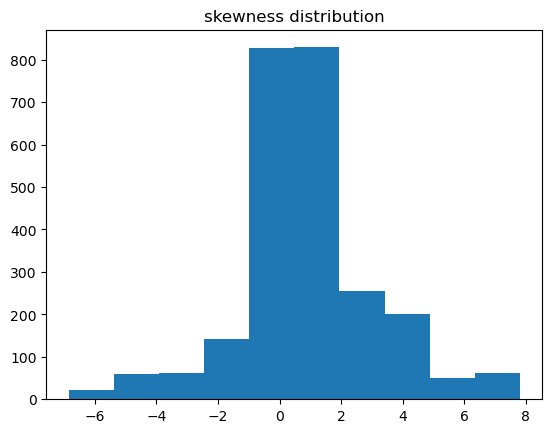

In [27]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

   # Assuming you have your dataset in a variable 'data' with 160000 rows and 2517 columns

  # Calculate skewness for each column
skewness_values = np.apply_along_axis(skew, axis=0, arr=enc_df)
plt.hist(x = skewness_values)
plt.title('skewness distribution')


Text(0.5, 1.0, 'kurtosis distribution')

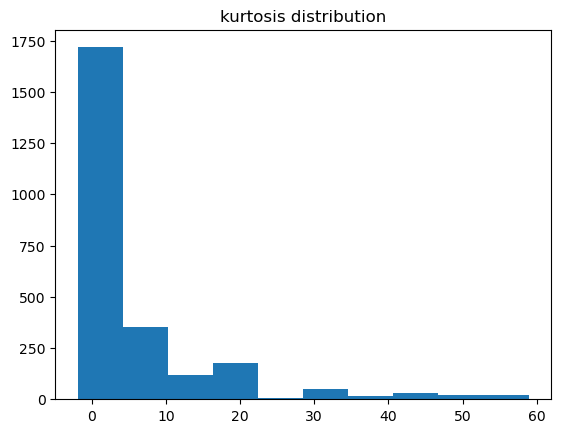

In [28]:
kurtosis_values = np.apply_along_axis(kurtosis, axis=0, arr=enc_df)
plt.hist(x = kurtosis_values)
plt.title('kurtosis distribution')

In [29]:
import numpy as np
from scipy.stats import kurtosis, boxcox, yeojohnson
from sklearn.preprocessing import StandardScaler

# Assuming you have your dataset in a variable 'data' with 160000 rows and 2517 columns
# Assuming you want to skip the first 11 columns and start from the 12th column onwards

# Define the starting column index
start_column = 12

# Slice the dataset to include only columns from the 12th column onwards
X = enc_df.iloc[:, start_column:]

# Calculate kurtosis for each column
kurtosis_values = np.apply_along_axis(kurtosis, axis=0, arr=X)

# Define a threshold for kurtosis to identify columns with anomalies
kurtosis_threshold = 3  # Normal distribution has kurtosis = 3

# Initialize lists to keep track of columns to transform
columns_to_boxcox = []
columns_to_yeojohnson = []
columns_to_sqrt = []
columns_to_log = []

# Iterate through kurtosis values and apply transformations
for i, kurt in enumerate(kurtosis_values):
    if kurt > kurtosis_threshold:
        # If kurtosis is greater than the threshold (leptokurtic), apply Box-Cox or Yeo-Johnson transformations
        try:
            transformed_column, _ = boxcox(X.iloc[:, i] + 1)  # Adding 1 to avoid issues with zero or negative values
            X.iloc[:, i] = transformed_column
            columns_to_boxcox.append(i)
        except ValueError:
            # Box-Cox may not work for all distributions, so we handle exceptions
            transformed_column, _ = yeojohnson(X.iloc[:, i] + 1)  # Yeo-Johnson transformation
            X.iloc[:, i] = transformed_column
            columns_to_yeojohnson.append(i)
    elif kurt < kurtosis_threshold:
        # If kurtosis is less than the threshold (platykurtic), apply sqrt or log transformations
        if np.min(X.iloc[:, i]) >= 0:
            transformed_column = np.sqrt(X.iloc[:, i])
            X.iloc[:, i] = transformed_column
            columns_to_sqrt.append(i)
        else:
            # Log transformation is not applicable to negative values
            transformed_column = np.log(X.iloc[:, i] - np.min(X.iloc[:, i]) + 1)  # Adding 1 to avoid issues with zero or negative values
            X.iloc[:, i] = transformed_column
            columns_to_log.append(i)


C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [30]:
X

,Combo IC50,Library Emax,Bliss Emax,Combo Emax,Delta Xmid,Delta Emax,Synergy?,ATS1p_x,apol_x,Sp_x,...,TDB2m.1,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1
0,3.997902,0.973590,0.940954,0.922452,2.579475,0.034258,0.000000,9.340469,7.214573,5.500140,...,14.161234,22.176530,3.760553,14.161234,1.097541e+06,30.311873,25.500601,0.169104,17.718859,2.328959
1,2.449370,0.404138,0.396688,0.392435,2.443189,0.003354,0.000000,14.232987,11.106216,8.458353,...,15.359988,22.260217,3.979946,15.359988,1.420197e+06,30.326958,25.622316,0.169104,18.790686,2.418059
2,2.151855,0.023456,0.017778,0.092177,2.082313,-0.008193,0.000000,4.372089,3.660789,2.794496,...,12.940750,22.042835,3.931167,12.940750,1.036153e+06,28.889353,23.707159,0.169104,16.769546,2.213890
3,3.640572,0.956761,0.466511,0.452478,2.546336,0.012865,0.029944,11.287482,8.902886,6.782832,...,14.986445,22.208951,3.820153,14.986445,1.215301e+06,30.976275,25.995615,0.169104,19.172456,2.360903
4,2.421686,0.677943,0.634011,0.463057,2.649514,0.181493,0.000000,15.710505,11.927138,9.091241,...,13.353279,21.767398,3.856395,13.353279,1.206909e+06,30.070852,25.053007,0.169104,17.464658,2.294537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153607,2.578194,0.493699,0.489674,0.477058,2.450777,0.012169,0.000000,10.155931,7.927701,6.041694,...,13.346351,21.993482,3.694417,13.346351,1.073700e+06,29.270890,23.630736,0.169104,17.800412,2.154137
153608,2.974246,0.749725,0.552519,0.511689,2.497558,0.043106,0.000000,10.428478,8.233640,6.273355,...,15.214603,21.822691,3.702655,15.214603,1.858739e+06,32.234367,27.706201,0.169104,19.237629,2.425271
153609,3.514348,0.951247,0.922598,0.872181,2.591419,0.089020,0.000000,10.499065,8.058489,6.131261,...,16.700243,22.945828,3.370572,16.700243,1.713920e+06,29.432830,27.406765,0.169104,19.131741,2.188883
153610,3.586985,0.911886,0.894702,0.892915,2.444170,0.003193,0.000000,10.793208,8.209643,6.241557,...,17.446335,23.545123,3.117483,17.446335,0.000000e+00,23.203493,24.047603,0.169104,23.947513,1.746061


In [31]:
enc_df.columns.to_list()

['Cell Line name',
 'SDIM',
 'Tissue',
 'Cancer Type',
 'Anchor Name',
 'Anchor Target',
 'Anchor Pathway',
 'Anchor Conc',
 'Library Name',
 'library Target',
 ' Library Pathway',
 'Maxc',
 'Combo IC50',
 'Library Emax',
 'Bliss Emax',
 'Combo Emax',
 'Delta Xmid',
 'Delta Emax',
 'Synergy?',
 'ATS1p_x',
 'apol_x',
 'Sp_x',
 'ATS0v_x',
 'ZMIC0_x',
 'ATS1v_x',
 'Sv_x',
 'ATSC0v',
 'McGowan_Volume_x',
 'CrippenMR',
 'ATS2p_x',
 'nBonds2',
 'nHeavyAtom_x',
 'ATS2v_x',
 'ATS3p_x',
 'WTPT-1_x',
 'VR3_D',
 'ATS1i',
 'nAtom',
 'Spe',
 'Sare',
 'ATS3v_x',
 'Si',
 'nBonds',
 'nC',
 'nBondsS3',
 'ATS0p',
 'TIC1',
 'ATS4p',
 'ATS0i',
 'Zagreb_x',
 'TIC4',
 'TIC5',
 'nBondsS',
 'nBondsS2',
 'TIC3',
 'ATS2e',
 'AMR_x',
 'TIC2',
 'MPC2',
 'ATSC1m_x',
 'AATSC0v',
 'PetitjeanNumber',
 'AATS4i',
 'AATS4e',
 'AATS3e',
 'AATS3i',
 'VE1_Dt',
 'SIC3',
 'SIC4',
 'AATSC0p',
 'SIC5',
 'AATSC1m_x',
 'BIC3',
 'AATSC2c_x',
 'topoShape_x',
 'topoRadius_x',
 'WPATH_x',
 'SpAD_D_x',
 'SpMax_D_x',
 'SpDiam_D_x',
 '

In [32]:
# Get the columns that were transformed
transformed_columns = X.columns

# Update the columns in 'enc_df' with the transformed data
enc_df[transformed_columns] = X

In [33]:
enc_df

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,TDB2m.1,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1
0,0,0,0,0,0,0,0,0.25000,0,0,...,14.161234,22.176530,3.760553,14.161234,1.097541e+06,30.311873,25.500601,0.169104,17.718859,2.328959
1,1,1,0,0,1,1,1,0.00025,1,1,...,15.359988,22.260217,3.979946,15.359988,1.420197e+06,30.326958,25.622316,0.169104,18.790686,2.418059
2,2,2,0,0,2,2,2,10.00000,2,2,...,12.940750,22.042835,3.931167,12.940750,1.036153e+06,28.889353,23.707159,0.169104,16.769546,2.213890
3,3,3,0,0,3,3,0,2.50000,3,3,...,14.986445,22.208951,3.820153,14.986445,1.215301e+06,30.976275,25.995615,0.169104,19.172456,2.360903
4,4,4,0,0,4,4,3,0.62500,4,4,...,13.353279,21.767398,3.856395,13.353279,1.206909e+06,30.070852,25.053007,0.169104,17.464658,2.294537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153607,32,32,0,0,19,19,10,2.50000,39,36,...,13.346351,21.993482,3.694417,13.346351,1.073700e+06,29.270890,23.630736,0.169104,17.800412,2.154137
153608,14,14,0,0,5,5,4,2.00000,37,35,...,15.214603,21.822691,3.702655,15.214603,1.858739e+06,32.234367,27.706201,0.169104,19.237629,2.425271
153609,36,36,0,0,8,8,7,2.50000,29,28,...,16.700243,22.945828,3.370572,16.700243,1.713920e+06,29.432830,27.406765,0.169104,19.131741,2.188883
153610,5,5,0,0,6,6,5,10.00000,10,10,...,17.446335,23.545123,3.117483,17.446335,0.000000e+00,23.203493,24.047603,0.169104,23.947513,1.746061


C:\Users\Admin\anaconda3\Lib\site-packages\numpy\lib\shape_base.py:402: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  buff[ind] = asanyarray(func1d(inarr_view[ind], *args, **kwargs))
C:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1203: RuntimeWarning: overflow encountered in square
  s = s**2


Text(0.5, 1.0, 'kurtosis distribution')

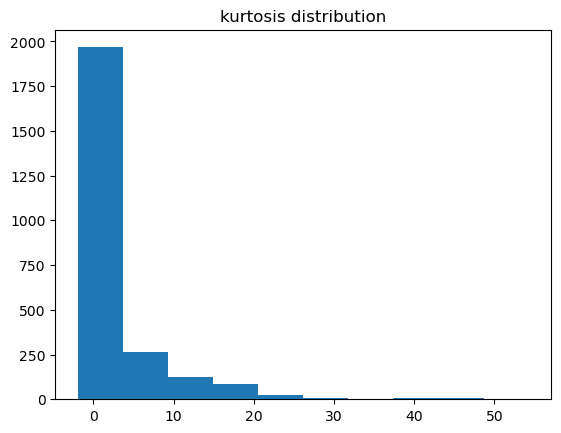

In [34]:
kurtosis_values = np.apply_along_axis(kurtosis, axis=0, arr=enc_df)
plt.hist(x = kurtosis_values)
plt.title('kurtosis distribution')

In [35]:
#import numpy as np
#data = pd.concat([enc_df, Y], axis = 1)

In [36]:
data

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1,Library IC50
0,0,0,0,0,0,0,0,0.25000,0,0,...,22.176530,3.760553,14.161234,1.097541e+06,30.311873,25.500601,0.169104,17.718859,2.328959,17.710236
1,1,1,0,0,1,1,1,0.00025,1,1,...,22.260217,3.979946,15.359988,1.420197e+06,30.326958,25.622316,0.169104,18.790686,2.418059,6.045908
2,2,2,0,0,2,2,2,10.00000,2,2,...,22.042835,3.931167,12.940750,1.036153e+06,28.889353,23.707159,0.169104,16.769546,2.213890,1.190284
3,3,3,0,0,3,3,0,2.50000,3,3,...,22.208951,3.820153,14.986445,1.215301e+06,30.976275,25.995615,0.169104,19.172456,2.360903,14.550839
4,4,4,0,0,4,4,3,0.62500,4,4,...,21.767398,3.856395,13.353279,1.206909e+06,30.070852,25.053007,0.169104,17.464658,2.294537,8.548526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153607,32,32,0,0,19,19,10,2.50000,39,36,...,21.993482,3.694417,13.346351,1.073700e+06,29.270890,23.630736,0.169104,17.800412,2.154137,6.781239
153608,14,14,0,0,5,5,4,2.00000,37,35,...,21.822691,3.702655,15.214603,1.858739e+06,32.234367,27.706201,0.169104,19.237629,2.425271,9.535721
153609,36,36,0,0,8,8,7,2.50000,29,28,...,22.945828,3.370572,16.700243,1.713920e+06,29.432830,27.406765,0.169104,19.131741,2.188883,14.236143
153610,5,5,0,0,6,6,5,10.00000,10,10,...,23.545123,3.117483,17.446335,0.000000e+00,23.203493,24.047603,0.169104,23.947513,1.746061,12.924242


In [81]:
# Import the necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your original DataFrame

# Standardize the 'data' DataFrame
scaler = StandardScaler()
data_std = scaler.fit_transform(enc_df)
data_std = pd.DataFrame(data_std, columns=enc_df.columns)

In [83]:
data_std = pd.concat([data_std, Y], axis = 1)


In [84]:
data_std

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1,Library IC50
0,-1.386655,-1.386655,0.0,0.0,-1.662298,-1.662298,-1.690720,-0.480770,-1.694205,-1.732898,...,-0.077166,-0.297072,-0.565109,-0.639410,-0.223286,-0.261468,-0.427673,-0.624512,-0.116656,17.710236
1,-1.322101,-1.322101,0.0,0.0,-1.517780,-1.517780,-1.410980,-0.531836,-1.626278,-1.657021,...,0.151173,0.875372,0.339178,0.400854,-0.216762,-0.185623,-0.454183,-0.107921,0.366047,6.045908
2,-1.257547,-1.257547,0.0,0.0,-1.373261,-1.373261,-1.131240,1.512791,-1.558352,-1.581144,...,-0.441956,0.614692,-1.485789,-0.837328,-0.838534,-1.379027,-1.316997,-1.082054,-0.740047,1.190284
3,-1.192993,-1.192993,0.0,0.0,-1.228743,-1.228743,-1.690720,-0.020717,-1.490425,-1.505267,...,0.011293,0.021432,0.057394,-0.259744,0.064071,0.046993,0.207496,0.076081,0.056404,14.550839
4,-1.128439,-1.128439,0.0,0.0,-1.084224,-1.084224,-0.851501,-0.404095,-1.422499,-1.429390,...,-1.193487,0.215110,-1.174595,-0.286801,-0.327529,-0.540380,-1.091680,-0.747030,-0.303140,8.548526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153607,0.679067,0.679067,0.0,0.0,1.083554,1.083554,1.106678,-0.020717,0.954927,0.998678,...,-0.576614,-0.650509,-1.179821,-0.716275,-0.673517,-1.426649,-1.569757,-0.585206,-1.063759,6.781239
153608,-0.482901,-0.482901,0.0,0.0,-0.939706,-0.939706,-0.571761,-0.122951,0.819074,0.922801,...,-1.042620,-0.606483,0.229506,1.814737,0.608203,1.112921,0.820116,0.107493,0.405116,9.535721
153609,0.937283,0.937283,0.0,0.0,-0.506150,-0.506150,0.267458,-0.020717,0.275663,0.391661,...,2.021868,-2.381152,1.350208,1.347834,-0.603477,0.926332,2.017284,0.056458,-0.875521,14.236143
153610,-1.063886,-1.063886,0.0,0.0,-0.795187,-0.795187,-0.292021,1.512791,-1.014940,-0.974127,...,3.657047,-3.733669,1.913026,-4.177946,-3.297701,-1.166884,2.684624,2.377525,-3.274524,12.924242


In [59]:
anchor_actual_data = concatenated_df['Anchor Name']
anchor_actual_data = pd.DataFrame(anchor_actual_data)

In [64]:
anchor_actual_data

,Anchor Name
0,AZD7762
1,Docetaxel
2,5-Fluorouracil
3,MK-1775
4,Navitoclax
...,...
153607,Crizotinib
153608,Sapitinib
153609,Olaparib
153610,Linsitinib


In [85]:
anchor_standardised_data = data_std['Anchor Name']
anchor_standardised_data = pd.DataFrame(anchor_standardised_data)

In [118]:
anchor_standardised_data = anchor_standardised_data.rename(columns = {'Std_Value':'Anchor_Std_Value'})


In [119]:
anchor_standardised_data

,Anchor_Std_Value
0,-1.662298
1,-1.517780
2,-1.373261
3,-1.228743
4,-1.084224
...,...
153607,1.083554
153608,-0.939706
153609,-0.506150
153610,-0.795187


In [120]:

# Assuming you have two DataFrames: df1 and df2
anchor_data = pd.concat([anchor_actual_data, anchor_standardised_data], axis=1)



In [123]:

anchor_data = anchor_data.rename(columns={ 'Std_value': 'Anchor Name'}, inplace=False)

In [174]:
anchor_data.to_excel('anchor_drug_tracking.xlsx')

In [76]:
Library_actual_data = concatenated_df['Library Name']
Library_actual_data = pd.DataFrame(Library_actual_data)

In [128]:
Library_actual_data

,Library Name
0,AZD6482
1,Pictilisib
2,BI-2536
3,Venetoclax
4,Luminespib
...,...
153607,Bortezomib
153608,Camptothecin
153609,Temozolomide
153610,5-Fluorouracil


In [130]:
Library_standardised_data = data_std['Library Name']
Library_standardised_data = pd.DataFrame(Library_standardised_data)

In [131]:
Library_standardised_data

,Library Name
0,-1.694205
1,-1.626278
2,-1.558352
3,-1.490425
4,-1.422499
...,...
153607,0.954927
153608,0.819074
153609,0.275663
153610,-1.014940


In [132]:
Library_standardised_data = Library_standardised_data.rename(columns = {'Library Name':'Library_Std_Value'})

In [133]:

# Assuming you have two DataFrames: df1 and df2
Library_data = pd.concat([Library_actual_data, Library_standardised_data], axis=1)

In [173]:
Library_data.to_excel('library_drugs_track.xlsx')

In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

from collections import defaultdict
import matplotlib.pyplot as plt


# Define your features (independent variables) and target (IC50 values) columns
X = data_std.drop(columns=['Combo IC50'])  # Replace with your feature columns
y = data_std['Combo IC50']  # Replace with your IC50 column

# Group data by unique drug combinations (assuming 'Anchor' and 'Library' are your drug columns)
grouped = data_std.groupby(['Anchor Name', 'Library Name'])

# Initialize lists and a dictionary to store results
drug_combinations = []
r_squared_values = []
rmse_values = []
ic50_means = defaultdict(list)

# Iterate through each unique drug combination group
for group_name, group_data in grouped:
    print(f"Processing group: {group_name}")
    # Split the data into training and testing sets (adjust test_size and random_state as needed)
    X_train, X_test, y_train, y_test = train_test_split(
        group_data.drop(columns=['Combo IC50']),  # Replace with your feature columns
        group_data['Combo IC50'],  # Replace with your IC50 column
        test_size=0.2,
        random_state=42
    )

    # Build an XGBoost model (customize hyperparameters as needed)
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate R-squared
    r_squared = r2_score(y_test, predictions)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    # Calculate the mean IC50 value for this group
    ic50_mean = group_data['Combo IC50'].mean()

    # Store results
    drug_combinations.append(group_name)
    r_squared_values.append(r_squared)
    rmse_values.append(rmse)
    ic50_means[group_name].append(ic50_mean)
    print(f"Processed group: {group_name}")

# Create a new DataFrame to store the results
results_df = pd.DataFrame({
    'Drug_Combination': drug_combinations,
    'R_squared': r_squared_values,
    'RMSE': rmse_values,
    'IC50_Values': ic50_mean
})




Processing group: (-1.6622984557356877, -1.6942048502587315)
Processed group: (-1.6622984557356877, -1.6942048502587315)
Processing group: (-1.6622984557356877, -1.6262783857997247)
Processed group: (-1.6622984557356877, -1.6262783857997247)
Processing group: (-1.6622984557356877, -1.558351921340718)
Processed group: (-1.6622984557356877, -1.558351921340718)
Processing group: (-1.6622984557356877, -1.4904254568817115)
Processed group: (-1.6622984557356877, -1.4904254568817115)
Processing group: (-1.6622984557356877, -1.4224989924227047)
Processed group: (-1.6622984557356877, -1.4224989924227047)
Processing group: (-1.6622984557356877, -1.354572527963698)
Processed group: (-1.6622984557356877, -1.354572527963698)
Processing group: (-1.6622984557356877, -1.2866460635046912)
Processed group: (-1.6622984557356877, -1.2866460635046912)
Processing group: (-1.6622984557356877, -1.2187195990456845)
Processed group: (-1.6622984557356877, -1.2187195990456845)
Processing group: (-1.66229845573568

Processed group: (-1.517779887908489, -0.40360202553760416)
Processing group: (-1.517779887908489, -0.3356755610785975)
Processed group: (-1.517779887908489, -0.3356755610785975)
Processing group: (-1.517779887908489, -0.26774909661959073)
Processed group: (-1.517779887908489, -0.26774909661959073)
Processing group: (-1.517779887908489, -0.19982263216058405)
Processed group: (-1.517779887908489, -0.19982263216058405)
Processing group: (-1.517779887908489, -0.13189616770157736)
Processed group: (-1.517779887908489, -0.13189616770157736)
Processing group: (-1.517779887908489, -0.06396970324257065)
Processed group: (-1.517779887908489, -0.06396970324257065)
Processing group: (-1.517779887908489, 0.003956761216436053)
Processed group: (-1.517779887908489, 0.003956761216436053)
Processing group: (-1.517779887908489, 0.07188322567544275)
Processed group: (-1.517779887908489, 0.07188322567544275)
Processing group: (-1.517779887908489, 0.13980969013444947)
Processed group: (-1.517779887908489,

Processed group: (-1.3732613200812902, 0.8870007991835231)
Processing group: (-1.3732613200812902, 0.9549272636425299)
Processed group: (-1.3732613200812902, 0.9549272636425299)
Processing group: (-1.3732613200812902, 1.0228537281015366)
Processed group: (-1.3732613200812902, 1.0228537281015366)
Processing group: (-1.3732613200812902, 1.0907801925605434)
Processed group: (-1.3732613200812902, 1.0907801925605434)
Processing group: (-1.3732613200812902, 1.15870665701955)
Processed group: (-1.3732613200812902, 1.15870665701955)
Processing group: (-1.3732613200812902, 1.2266331214785566)
Processed group: (-1.3732613200812902, 1.2266331214785566)
Processing group: (-1.3732613200812902, 1.2945595859375634)
Processed group: (-1.3732613200812902, 1.2945595859375634)
Processing group: (-1.3732613200812902, 1.3624860503965701)
Processed group: (-1.3732613200812902, 1.3624860503965701)
Processing group: (-1.3732613200812902, 1.4304125148555769)
Processed group: (-1.3732613200812902, 1.43041251485

Processed group: (-1.0842241844268927, -1.2866460635046912)
Processing group: (-1.0842241844268927, -1.2187195990456845)
Processed group: (-1.0842241844268927, -1.2187195990456845)
Processing group: (-1.0842241844268927, -1.1507931345866778)
Processed group: (-1.0842241844268927, -1.1507931345866778)
Processing group: (-1.0842241844268927, -1.0828666701276712)
Processed group: (-1.0842241844268927, -1.0828666701276712)
Processing group: (-1.0842241844268927, -1.0149402056686645)
Processed group: (-1.0842241844268927, -1.0149402056686645)
Processing group: (-1.0842241844268927, -0.9470137412096578)
Processed group: (-1.0842241844268927, -0.9470137412096578)
Processing group: (-1.0842241844268927, -0.879087276750651)
Processed group: (-1.0842241844268927, -0.879087276750651)
Processing group: (-1.0842241844268927, -0.8111608122916444)
Processed group: (-1.0842241844268927, -0.8111608122916444)
Processing group: (-1.0842241844268927, -0.7432343478326376)
Processed group: (-1.0842241844268

Processed group: (-0.9397056165996941, 0.003956761216436053)
Processing group: (-0.9397056165996941, 0.07188322567544275)
Processed group: (-0.9397056165996941, 0.07188322567544275)
Processing group: (-0.9397056165996941, 0.13980969013444947)
Processed group: (-0.9397056165996941, 0.13980969013444947)
Processing group: (-0.9397056165996941, 0.20773615459345615)
Processed group: (-0.9397056165996941, 0.20773615459345615)
Processing group: (-0.9397056165996941, 0.27566261905246287)
Processed group: (-0.9397056165996941, 0.27566261905246287)
Processing group: (-0.9397056165996941, 0.34358908351146955)
Processed group: (-0.9397056165996941, 0.34358908351146955)
Processing group: (-0.9397056165996941, 0.41151554797047624)
Processed group: (-0.9397056165996941, 0.41151554797047624)
Processing group: (-0.9397056165996941, 0.479442012429483)
Processed group: (-0.9397056165996941, 0.479442012429483)
Processing group: (-0.9397056165996941, 0.5473684768884897)
Processed group: (-0.939705616599694

Processed group: (-0.7951870487724954, 1.2266331214785566)
Processing group: (-0.7951870487724954, 1.2945595859375634)
Processed group: (-0.7951870487724954, 1.2945595859375634)
Processing group: (-0.7951870487724954, 1.3624860503965701)
Processed group: (-0.7951870487724954, 1.3624860503965701)
Processing group: (-0.7951870487724954, 1.4304125148555769)
Processed group: (-0.7951870487724954, 1.4304125148555769)
Processing group: (-0.7951870487724954, 1.4983389793145834)
Processed group: (-0.7951870487724954, 1.4983389793145834)
Processing group: (-0.7951870487724954, 1.5662654437735901)
Processed group: (-0.7951870487724954, 1.5662654437735901)
Processing group: (-0.7951870487724954, 1.6341919082325969)
Processed group: (-0.7951870487724954, 1.6341919082325969)
Processing group: (-0.6506684809452967, -1.6942048502587315)
Processed group: (-0.6506684809452967, -1.6942048502587315)
Processing group: (-0.6506684809452967, -1.6262783857997247)
Processed group: (-0.6506684809452967, -1.626

Processed group: (-0.506149913118098, -0.879087276750651)
Processing group: (-0.506149913118098, -0.8111608122916444)
Processed group: (-0.506149913118098, -0.8111608122916444)
Processing group: (-0.506149913118098, -0.7432343478326376)
Processed group: (-0.506149913118098, -0.7432343478326376)
Processing group: (-0.506149913118098, -0.6753078833736309)
Processed group: (-0.506149913118098, -0.6753078833736309)
Processing group: (-0.506149913118098, -0.6073814189146243)
Processed group: (-0.506149913118098, -0.6073814189146243)
Processing group: (-0.506149913118098, -0.5394549544556175)
Processed group: (-0.506149913118098, -0.5394549544556175)
Processing group: (-0.506149913118098, -0.47152848999661084)
Processed group: (-0.506149913118098, -0.47152848999661084)
Processing group: (-0.506149913118098, -0.40360202553760416)
Processed group: (-0.506149913118098, -0.40360202553760416)
Processing group: (-0.506149913118098, -0.3356755610785975)
Processed group: (-0.506149913118098, -0.3356

Processed group: (-0.36163134529089924, 0.41151554797047624)
Processing group: (-0.36163134529089924, 0.479442012429483)
Processed group: (-0.36163134529089924, 0.479442012429483)
Processing group: (-0.36163134529089924, 0.5473684768884897)
Processed group: (-0.36163134529089924, 0.5473684768884897)
Processing group: (-0.36163134529089924, 0.6152949413474964)
Processed group: (-0.36163134529089924, 0.6152949413474964)
Processing group: (-0.36163134529089924, 0.683221405806503)
Processed group: (-0.36163134529089924, 0.683221405806503)
Processing group: (-0.36163134529089924, 0.7511478702655098)
Processed group: (-0.36163134529089924, 0.7511478702655098)
Processing group: (-0.36163134529089924, 0.8190743347245164)
Processed group: (-0.36163134529089924, 0.8190743347245164)
Processing group: (-0.36163134529089924, 0.8870007991835231)
Processed group: (-0.36163134529089924, 0.8870007991835231)
Processing group: (-0.36163134529089924, 0.9549272636425299)
Processed group: (-0.36163134529089

Processed group: (-0.21711277746370056, 1.7021183726916036)
Processing group: (-0.07259420963650184, -1.6942048502587315)
Processed group: (-0.07259420963650184, -1.6942048502587315)
Processing group: (-0.07259420963650184, -1.6262783857997247)
Processed group: (-0.07259420963650184, -1.6262783857997247)
Processing group: (-0.07259420963650184, -1.558351921340718)
Processed group: (-0.07259420963650184, -1.558351921340718)
Processing group: (-0.07259420963650184, -1.4904254568817115)
Processed group: (-0.07259420963650184, -1.4904254568817115)
Processing group: (-0.07259420963650184, -1.4224989924227047)
Processed group: (-0.07259420963650184, -1.4224989924227047)
Processing group: (-0.07259420963650184, -1.354572527963698)
Processed group: (-0.07259420963650184, -1.354572527963698)
Processing group: (-0.07259420963650184, -1.2866460635046912)
Processed group: (-0.07259420963650184, -1.2866460635046912)
Processing group: (-0.07259420963650184, -1.2187195990456845)
Processed group: (-0.

Processed group: (0.07192435819069687, -0.47152848999661084)
Processing group: (0.07192435819069687, -0.40360202553760416)
Processed group: (0.07192435819069687, -0.40360202553760416)
Processing group: (0.07192435819069687, -0.3356755610785975)
Processed group: (0.07192435819069687, -0.3356755610785975)
Processing group: (0.07192435819069687, -0.26774909661959073)
Processed group: (0.07192435819069687, -0.26774909661959073)
Processing group: (0.07192435819069687, -0.19982263216058405)
Processed group: (0.07192435819069687, -0.19982263216058405)
Processing group: (0.07192435819069687, -0.13189616770157736)
Processed group: (0.07192435819069687, -0.13189616770157736)
Processing group: (0.07192435819069687, -0.06396970324257065)
Processed group: (0.07192435819069687, -0.06396970324257065)
Processing group: (0.07192435819069687, 0.003956761216436053)
Processed group: (0.07192435819069687, 0.003956761216436053)
Processing group: (0.07192435819069687, 0.07188322567544275)
Processed group: (0

Processed group: (0.21644292601789558, 0.683221405806503)
Processing group: (0.21644292601789558, 0.7511478702655098)
Processed group: (0.21644292601789558, 0.7511478702655098)
Processing group: (0.21644292601789558, 0.8190743347245164)
Processed group: (0.21644292601789558, 0.8190743347245164)
Processing group: (0.21644292601789558, 0.8870007991835231)
Processed group: (0.21644292601789558, 0.8870007991835231)
Processing group: (0.21644292601789558, 0.9549272636425299)
Processed group: (0.21644292601789558, 0.9549272636425299)
Processing group: (0.21644292601789558, 1.0228537281015366)
Processed group: (0.21644292601789558, 1.0228537281015366)
Processing group: (0.21644292601789558, 1.0907801925605434)
Processed group: (0.21644292601789558, 1.0907801925605434)
Processing group: (0.21644292601789558, 1.15870665701955)
Processed group: (0.21644292601789558, 1.15870665701955)
Processing group: (0.21644292601789558, 1.2266331214785566)
Processed group: (0.21644292601789558, 1.226633121478

Processed group: (0.505480061672293, -1.354572527963698)
Processing group: (0.505480061672293, -1.2866460635046912)
Processed group: (0.505480061672293, -1.2866460635046912)
Processing group: (0.505480061672293, -1.2187195990456845)
Processed group: (0.505480061672293, -1.2187195990456845)
Processing group: (0.505480061672293, -1.1507931345866778)
Processed group: (0.505480061672293, -1.1507931345866778)
Processing group: (0.505480061672293, -1.0828666701276712)
Processed group: (0.505480061672293, -1.0828666701276712)
Processing group: (0.505480061672293, -1.0149402056686645)
Processed group: (0.505480061672293, -1.0149402056686645)
Processing group: (0.505480061672293, -0.9470137412096578)
Processed group: (0.505480061672293, -0.9470137412096578)
Processing group: (0.505480061672293, -0.8111608122916444)
Processed group: (0.505480061672293, -0.8111608122916444)
Processing group: (0.505480061672293, -0.7432343478326376)
Processed group: (0.505480061672293, -0.7432343478326376)
Process

Processed group: (0.6499986294994917, 0.07188322567544275)
Processing group: (0.6499986294994917, 0.13980969013444947)
Processed group: (0.6499986294994917, 0.13980969013444947)
Processing group: (0.6499986294994917, 0.20773615459345615)
Processed group: (0.6499986294994917, 0.20773615459345615)
Processing group: (0.6499986294994917, 0.27566261905246287)
Processed group: (0.6499986294994917, 0.27566261905246287)
Processing group: (0.6499986294994917, 0.34358908351146955)
Processed group: (0.6499986294994917, 0.34358908351146955)
Processing group: (0.6499986294994917, 0.41151554797047624)
Processed group: (0.6499986294994917, 0.41151554797047624)
Processing group: (0.6499986294994917, 0.479442012429483)
Processed group: (0.6499986294994917, 0.479442012429483)
Processing group: (0.6499986294994917, 0.5473684768884897)
Processed group: (0.6499986294994917, 0.5473684768884897)
Processing group: (0.6499986294994917, 0.6152949413474964)
Processed group: (0.6499986294994917, 0.615294941347496

Processed group: (0.7945171973266905, 1.4304125148555769)
Processing group: (0.7945171973266905, 1.4983389793145834)
Processed group: (0.7945171973266905, 1.4983389793145834)
Processing group: (0.7945171973266905, 1.5662654437735901)
Processed group: (0.7945171973266905, 1.5662654437735901)
Processing group: (0.7945171973266905, 1.6341919082325969)
Processed group: (0.7945171973266905, 1.6341919082325969)
Processing group: (0.7945171973266905, 1.7021183726916036)
Processed group: (0.7945171973266905, 1.7021183726916036)
Processing group: (0.9390357651538891, -1.6942048502587315)
Processed group: (0.9390357651538891, -1.6942048502587315)
Processing group: (0.9390357651538891, -1.6262783857997247)
Processed group: (0.9390357651538891, -1.6262783857997247)
Processing group: (0.9390357651538891, -1.558351921340718)
Processed group: (0.9390357651538891, -1.558351921340718)
Processing group: (0.9390357651538891, -1.4904254568817115)
Processed group: (0.9390357651538891, -1.4904254568817115)


Processed group: (1.0835543329810877, -0.6753078833736309)
Processing group: (1.0835543329810877, -0.6073814189146243)
Processed group: (1.0835543329810877, -0.6073814189146243)
Processing group: (1.0835543329810877, -0.5394549544556175)
Processed group: (1.0835543329810877, -0.5394549544556175)
Processing group: (1.0835543329810877, -0.47152848999661084)
Processed group: (1.0835543329810877, -0.47152848999661084)
Processing group: (1.0835543329810877, -0.40360202553760416)
Processed group: (1.0835543329810877, -0.40360202553760416)
Processing group: (1.0835543329810877, -0.3356755610785975)
Processed group: (1.0835543329810877, -0.3356755610785975)
Processing group: (1.0835543329810877, -0.26774909661959073)
Processed group: (1.0835543329810877, -0.26774909661959073)
Processing group: (1.0835543329810877, -0.19982263216058405)
Processed group: (1.0835543329810877, -0.19982263216058405)
Processing group: (1.0835543329810877, -0.13189616770157736)
Processed group: (1.0835543329810877, -

Processed group: (1.2280729008082865, 0.7511478702655098)
Processing group: (1.2280729008082865, 0.8190743347245164)
Processed group: (1.2280729008082865, 0.8190743347245164)
Processing group: (1.2280729008082865, 0.8870007991835231)
Processed group: (1.2280729008082865, 0.8870007991835231)
Processing group: (1.2280729008082865, 0.9549272636425299)
Processed group: (1.2280729008082865, 0.9549272636425299)
Processing group: (1.2280729008082865, 1.0228537281015366)
Processed group: (1.2280729008082865, 1.0228537281015366)
Processing group: (1.2280729008082865, 1.0907801925605434)
Processed group: (1.2280729008082865, 1.0907801925605434)
Processing group: (1.2280729008082865, 1.15870665701955)
Processed group: (1.2280729008082865, 1.15870665701955)
Processing group: (1.2280729008082865, 1.2266331214785566)
Processed group: (1.2280729008082865, 1.2266331214785566)
Processing group: (1.2280729008082865, 1.2945595859375634)
Processed group: (1.2280729008082865, 1.2945595859375634)
Processing

Processed group: (1.517110036462684, -1.354572527963698)
Processing group: (1.517110036462684, -1.2866460635046912)
Processed group: (1.517110036462684, -1.2866460635046912)
Processing group: (1.517110036462684, -1.2187195990456845)
Processed group: (1.517110036462684, -1.2187195990456845)
Processing group: (1.517110036462684, -1.1507931345866778)
Processed group: (1.517110036462684, -1.1507931345866778)
Processing group: (1.517110036462684, -1.0828666701276712)
Processed group: (1.517110036462684, -1.0828666701276712)
Processing group: (1.517110036462684, -1.0149402056686645)
Processed group: (1.517110036462684, -1.0149402056686645)
Processing group: (1.517110036462684, -0.9470137412096578)
Processed group: (1.517110036462684, -0.9470137412096578)
Processing group: (1.517110036462684, -0.879087276750651)
Processed group: (1.517110036462684, -0.879087276750651)
Processing group: (1.517110036462684, -0.8111608122916444)
Processed group: (1.517110036462684, -0.8111608122916444)
Processin

Processed group: (1.6616286042898827, 0.003956761216436053)
Processing group: (1.6616286042898827, 0.07188322567544275)
Processed group: (1.6616286042898827, 0.07188322567544275)
Processing group: (1.6616286042898827, 0.13980969013444947)
Processed group: (1.6616286042898827, 0.13980969013444947)
Processing group: (1.6616286042898827, 0.20773615459345615)
Processed group: (1.6616286042898827, 0.20773615459345615)
Processing group: (1.6616286042898827, 0.27566261905246287)
Processed group: (1.6616286042898827, 0.27566261905246287)
Processing group: (1.6616286042898827, 0.34358908351146955)
Processed group: (1.6616286042898827, 0.34358908351146955)
Processing group: (1.6616286042898827, 0.41151554797047624)
Processed group: (1.6616286042898827, 0.41151554797047624)
Processing group: (1.6616286042898827, 0.5473684768884897)
Processed group: (1.6616286042898827, 0.5473684768884897)
Processing group: (1.6616286042898827, 0.6152949413474964)
Processed group: (1.6616286042898827, 0.6152949413

In [176]:
ic50_means

defaultdict(list,
            {(-1.6622984557356877,
              -1.6942048502587315): [0.030438165548450878],
             (-1.6622984557356877, -1.6262783857997247): [-0.5039197144018243],
             (-1.6622984557356877, -1.558351921340718): [-1.457928777535413],
             (-1.6622984557356877, -1.4904254568817115): [0.9028406019655995],
             (-1.6622984557356877, -1.4224989924227047): [-0.4104450867602191],
             (-1.6622984557356877, -1.354572527963698): [-0.7682293862933016],
             (-1.6622984557356877, -1.2866460635046912): [0.5034922902584728],
             (-1.6622984557356877, -1.2187195990456845): [0.10223711997139438],
             (-1.6622984557356877,
              -1.1507931345866778): [-0.033324252222315255],
             (-1.6622984557356877, -1.0828666701276712): [0.5351923691978794],
             (-1.6622984557356877, -1.0149402056686645): [0.02260831009487509],
             (-1.6622984557356877, -0.9470137412096578): [-0.3325727446800787

In [165]:
# Sort results by mean IC50 values and select the top 15 lowest combinations
top_15_combinations = results_df.sort_values(by='IC50_Values').head(15)



In [166]:
top_15_combinations

,Drug_Combination,R_squared,RMSE,IC50_Values
0,"(-1.6622984557356877, -1.6942048502587315)",0.917069,0.209270,0.36062
803,"(0.6499986294994917, -1.4904254568817115)",0.831315,0.204257,0.36062
802,"(0.6499986294994917, -1.558351921340718)",0.929533,0.358950,0.36062
801,"(0.6499986294994917, -1.6262783857997247)",0.909009,0.195294,0.36062
800,"(0.6499986294994917, -1.6942048502587315)",0.775265,0.613396,0.36062
799,"(0.505480061672293, 1.7021183726916036)",0.906760,0.127487,0.36062
798,"(0.505480061672293, 1.6341919082325969)",0.704227,0.205397,0.36062
804,"(0.6499986294994917, -1.354572527963698)",0.947909,0.122997,0.36062
797,"(0.505480061672293, 1.5662654437735901)",0.889965,0.201955,0.36062
795,"(0.505480061672293, 1.4304125148555769)",0.955213,0.166130,0.36062


In [175]:
results_df.to_excel('overall_comb_pred.xlsx')

In [169]:
data_std.columns.to_list()

['Cell Line name',
 'SDIM',
 'Tissue',
 'Cancer Type',
 'Anchor Name',
 'Anchor Target',
 'Anchor Pathway',
 'Anchor Conc',
 'Library Name',
 'library Target',
 ' Library Pathway',
 'Maxc',
 'Combo IC50',
 'Library Emax',
 'Bliss Emax',
 'Combo Emax',
 'Delta Xmid',
 'Delta Emax',
 'Synergy?',
 'ATS1p_x',
 'apol_x',
 'Sp_x',
 'ATS0v_x',
 'ZMIC0_x',
 'ATS1v_x',
 'Sv_x',
 'ATSC0v',
 'McGowan_Volume_x',
 'CrippenMR',
 'ATS2p_x',
 'nBonds2',
 'nHeavyAtom_x',
 'ATS2v_x',
 'ATS3p_x',
 'WTPT-1_x',
 'VR3_D',
 'ATS1i',
 'nAtom',
 'Spe',
 'Sare',
 'ATS3v_x',
 'Si',
 'nBonds',
 'nC',
 'nBondsS3',
 'ATS0p',
 'TIC1',
 'ATS4p',
 'ATS0i',
 'Zagreb_x',
 'TIC4',
 'TIC5',
 'nBondsS',
 'nBondsS2',
 'TIC3',
 'ATS2e',
 'AMR_x',
 'TIC2',
 'MPC2',
 'ATSC1m_x',
 'AATSC0v',
 'PetitjeanNumber',
 'AATS4i',
 'AATS4e',
 'AATS3e',
 'AATS3i',
 'VE1_Dt',
 'SIC3',
 'SIC4',
 'AATSC0p',
 'SIC5',
 'AATSC1m_x',
 'BIC3',
 'AATSC2c_x',
 'topoShape_x',
 'topoRadius_x',
 'WPATH_x',
 'SpAD_D_x',
 'SpMax_D_x',
 'SpDiam_D_x',
 '

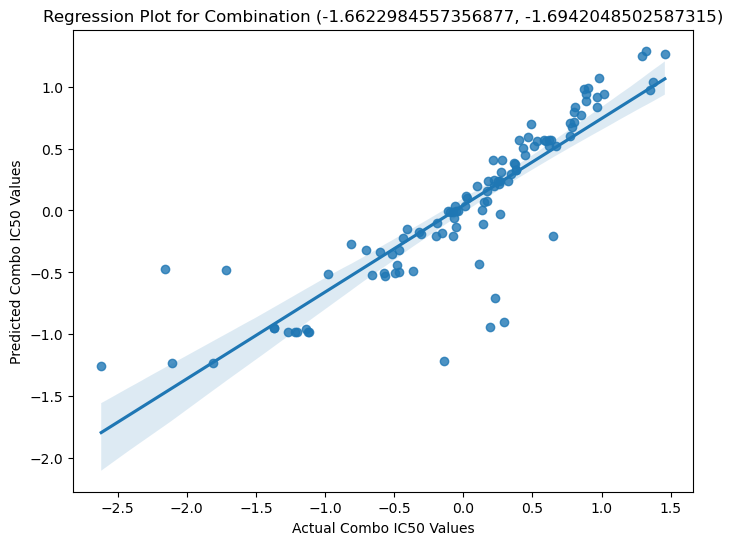

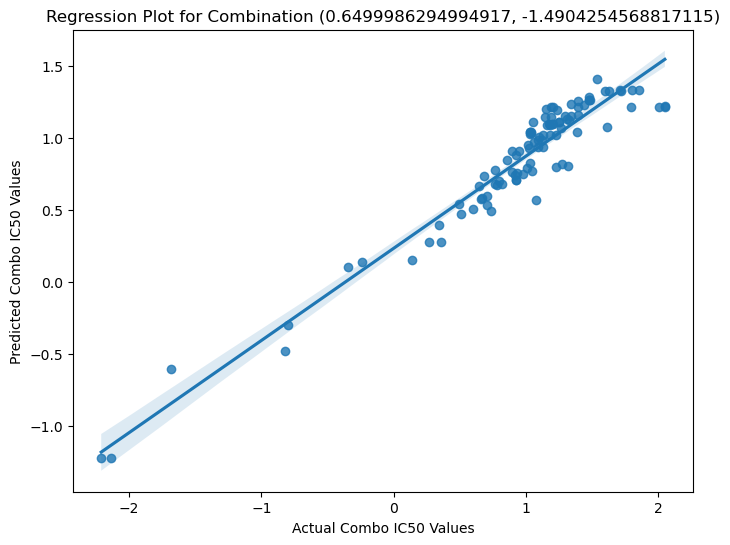

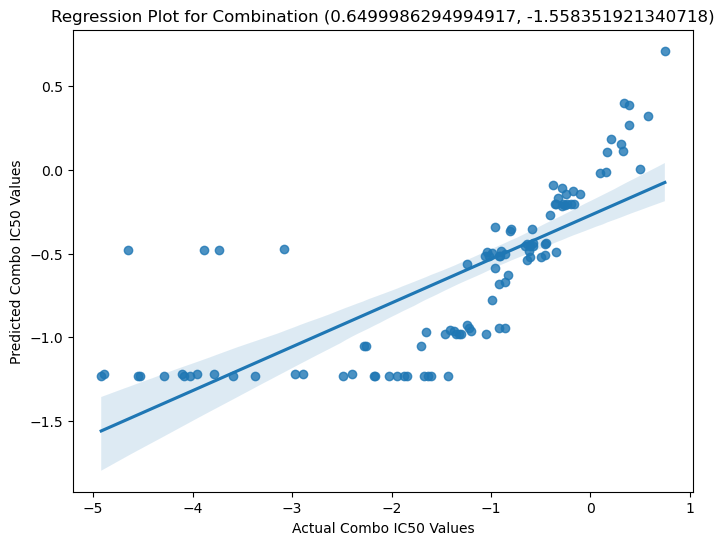

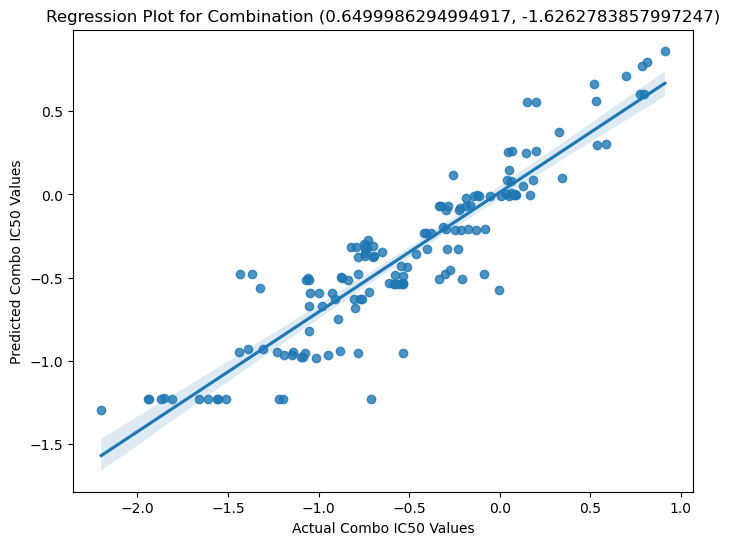

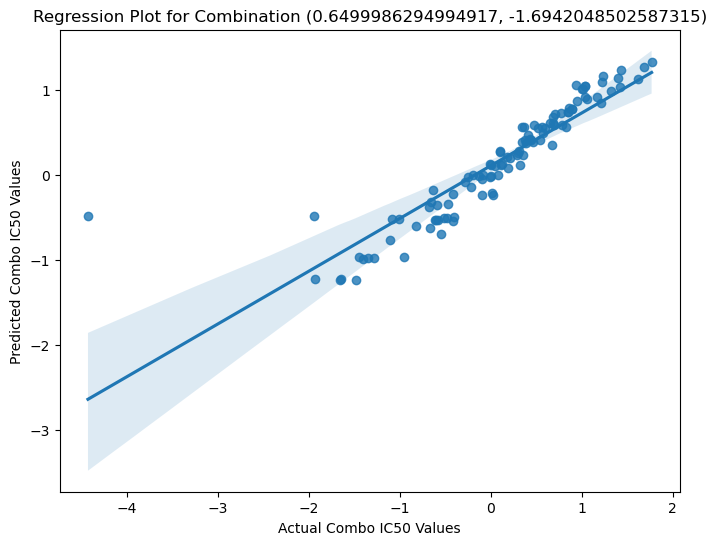

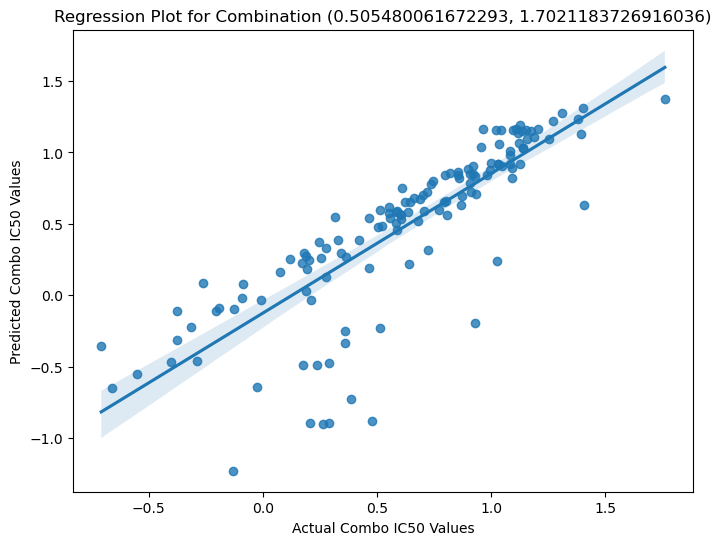

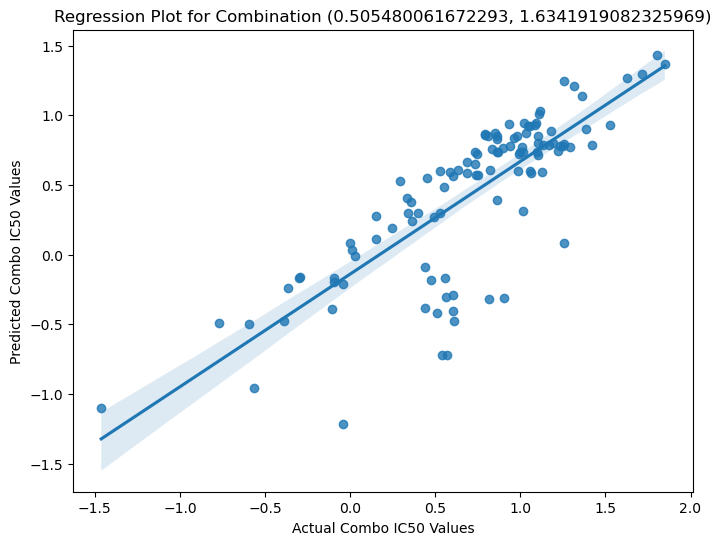

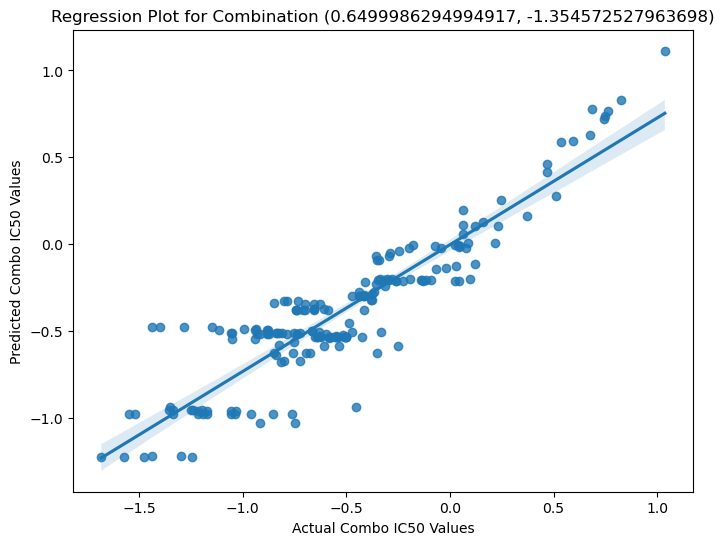

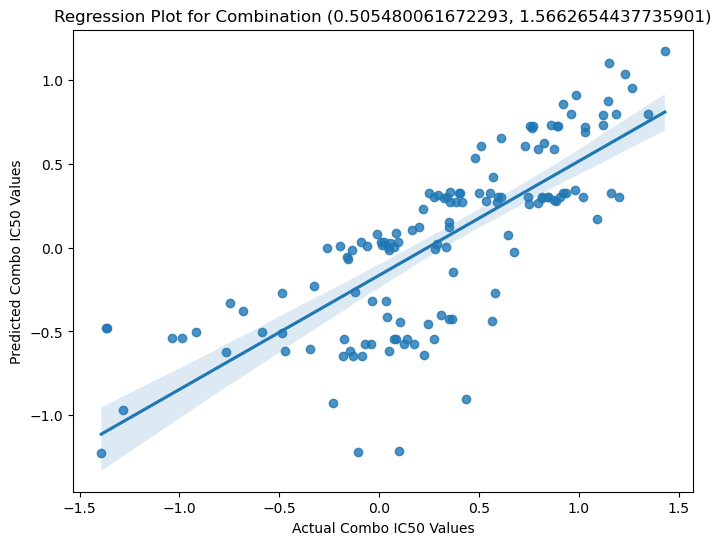

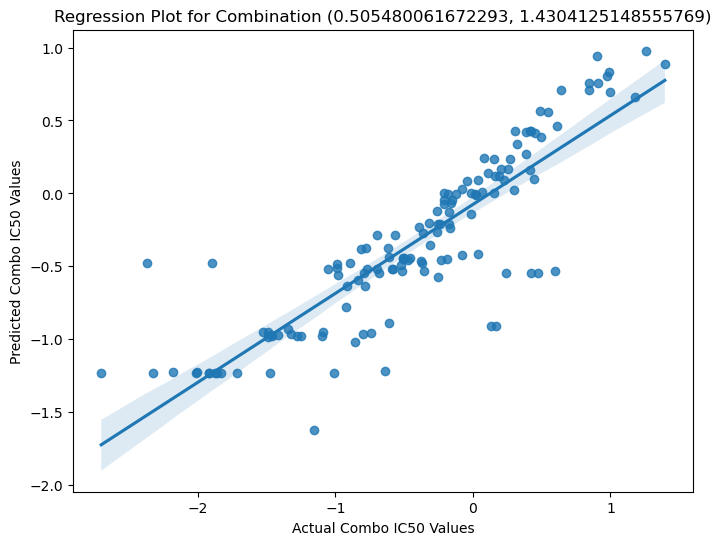

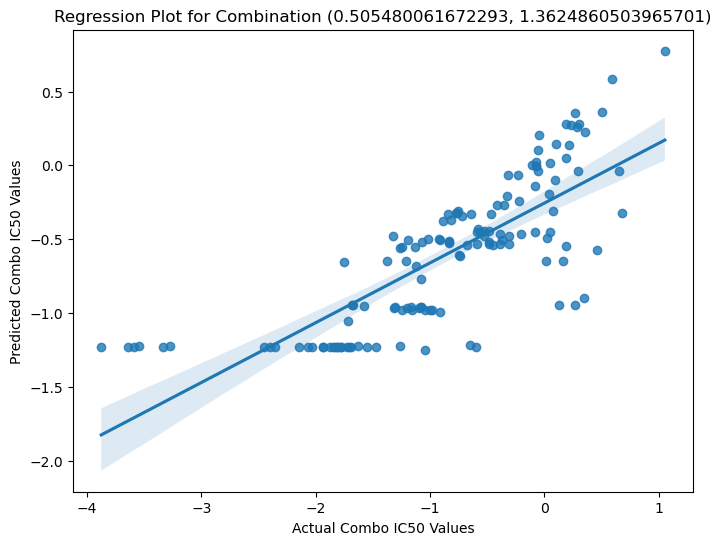

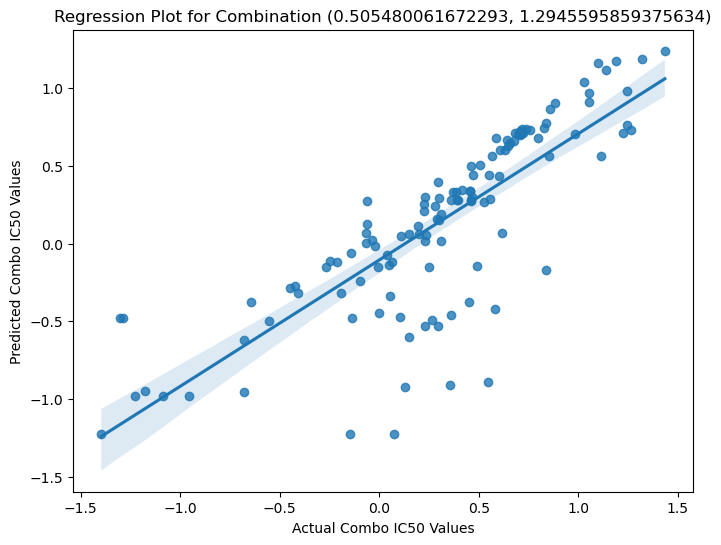

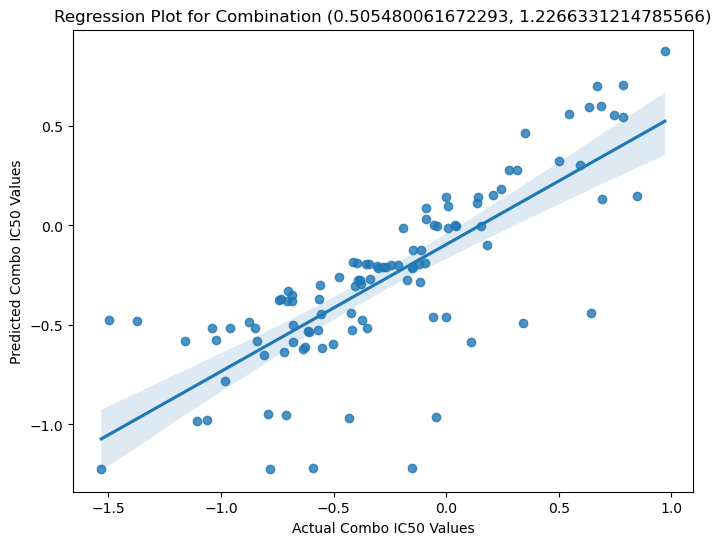

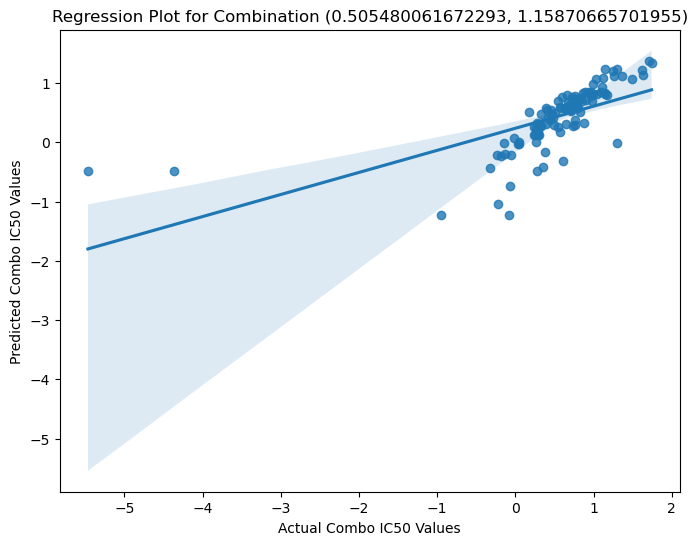

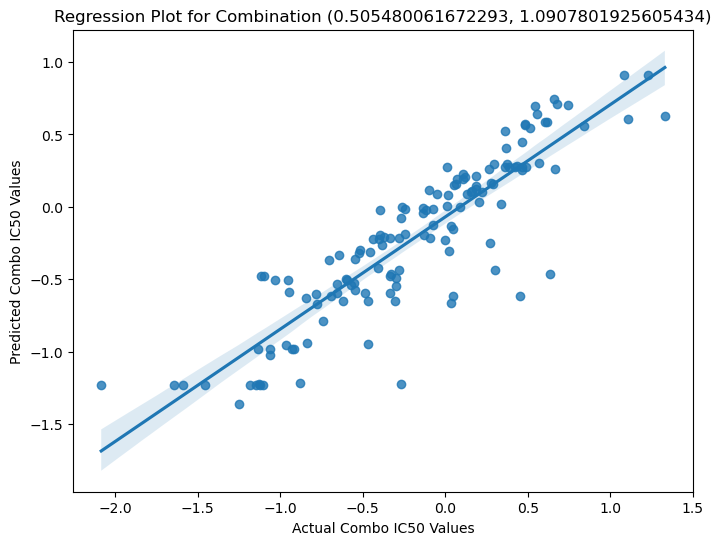

In [172]:
import seaborn as sns

# Iterate through the top 15 combinations and generate regression plots
for combination in top_15_combinations['Drug_Combination']:
    # Filter the data for the current combination
    combination_data = data_std[(data_std['Anchor Name'] == combination[0]) & (data_std['Library Name'] == combination[1])]

    # Generate a regression plot for this combination
    # Generate a regression plot for this combination
    plt.figure(figsize=(8, 6))
    sns.regplot(x='Combo IC50', y=model.predict(combination_data.drop(columns=['Combo IC50'])), data=combination_data)
    plt.title(f'Regression Plot for Combination {combination}')
    plt.xlabel('Actual Combo IC50 Values')
    plt.ylabel('Predicted Combo IC50 Values')
    # Save the plot in high quality (e.g., as a PNG)
    plt.savefig(f'Regression_Plot_{combination}.png', dpi=300, bbox_inches='tight')

    # Show the plot (optional)
    plt.show()


In [164]:
# chatgpt code to extract original data
# Iterate through the top 15 combinations and generate regression plots
for combination in top_15_combinations_['Drug_Combination']:
    # Split the combination into anchor and library drug names
    anchor_name, library_name = combination

    # Get the standardised values for anchor and library drugs from your DataFrames
    anchor_standardized_value = anchor_data.loc[anchor_data['Anchor Name'] == anchor_name, 'Anchor_Std_Value'].values[0]
    library_standardized_value = Library_data.loc[Library_data['Library Name'] == library_name, 'Library_Std_Value'].values[0]


    # Filter the data for the current combination
    combination_data = data_std[(data_std['Anchor Name'] == anchor_name) & (data_std['Library Name'] == library_name)]

    # Generate a regression plot for this combination
    plt.figure(figsize=(8, 6))
    plt.scatter(combination_data['Combo IC50'], model.predict(combination_data.drop(columns=['Combo IC50'])))
    plt.title(f'Regression Plot for Combination - Anchor: {anchor_standardized_value}, Library: {library_standardized_value}')
    plt.xlabel('Actual Combo IC50 Values')
    plt.ylabel('Predicted Combo IC50 Values')
    regression_plots.append(plt)  # Store the plot for later use

# Save the results to a CSV file with actual drug names
top_15_combinations['Anchor Name'] = top_15_combinations['Drug_Combination'].apply(lambda x: x[0])
top_15_combinations['Library Name'] = top_15_combinations['Drug_Combination'].apply(lambda x: x[1])
top_15_combinations = top_15_combinations.drop(columns=['Drug_Combination'])
top_15_combinations.to_csv('top_15_results_with_actual_names.csv', index=False)

# Show or save the regression plots as needed
#for i, plot in enumerate(regression_plots):
 #   plot.savefig(f'Regression_Plot_{i+1}.png')  # Save each plot as a separate image
  #  plt.show()  # Show the plot (optional)


ValueError: too many values to unpack (expected 2)

In [ ]:

    
    # Get the standardised values for anchor and library drugs from your DataFrames
    anchor_matches = anchor_data.loc[anchor_data['Anchor Name'] == anchor_name, 'Anchor_Std_Value']
    library_matches = Library_data.loc[Library_data['Library Name'] == library_name, 'Library_Std_Value']

    # Check if there are matches before accessing the values
    if not anchor_matches.empty and not library_matches.empty:
        anchor_standardized_value = anchor_matches.values[0]
        library_standardized_value = library_matches.values[0]
    else:
        print(f"No matches found for anchor: {anchor_name} or library: {library_name}")


    # Filter the data for the current combination
    combination_data = data_std[(data_std['Anchor Name'] == anchor_name) & (data_std['Library Name'] == library_name)]

    # Generate a regression plot for this combination
    plt.figure(figsize=(8, 6))
    plt.scatter(combination_data['Combo IC50'], model.predict(combination_data.drop(columns=['Combo IC50'])))
    plt.title(f'Regression Plot for Combination - Anchor: {anchor_standardized_value}, Library: {library_standardized_value}')
    plt.xlabel('Actual Combo IC50 Values')
    plt.ylabel('Predicted Combo IC50 Values')
    regression_plots.append(plt)  # Store the plot for later use

# Save the results to a CSV file with actual drug names
top_15_combinations['Anchor Name'] = top_15_combinations['Drug_Combination'].apply(lambda x: x[0])
top_15_combinations['Library Name'] = top_15_combinations['Drug_Combination'].apply(lambda x: x[1])
top_15_combinations = top_15_combinations.drop(columns=['Drug_Combination'])
top_15_combinations.to_csv('top_15_results_with_actual_names.csv', index=False)

# Show or save the regression plots as needed
#for i, plot in enumerate(regression_plots):
 #   plot.savefig(f'Regression_Plot_{i+1}.png')  # Save each plot as a separate image
  #  plt.show()  # Show the plot (optional)


In [ ]:

# Initialize lists to store regression plots for the top 15 combinations
regression_plots = []

# Iterate through the top 15 combinations and generate regression plots
for combination in top_15_combinations['Drug_Combination']:
    # Filter the data for the current combination
    combination_data = concatenated_df[(concatenated_df['Anchor Name'] == combination[0]) & (df['Library Name'] == combination[1])]

    # Generate a regression plot for this combination
    plt.figure(figsize=(8, 6))
    plt.scatter(combination_data['Combo IC50'], model.predict(combination_data.drop(columns=['Combo IC50'])))
    plt.title(f'Regression Plot for Combination {combination}')
    plt.xlabel('Actual Combo IC50 Values')
    plt.ylabel('Predicted Combo IC50 Values')
    regression_plots.append(plt)  # Store the plot for later use

# Save the results to a CSV file (replace 'top_15_results.csv' with your desired filename)
top_15_combinations.to_csv('top_15_results.csv', index=False)

# Show or save the regression plots as needed
for i, plot in enumerate(regression_plots):
    plot.savefig(f'Regression_Plot_{i+1}.png')  # Save each plot as a separate image
    plt.show()  # Show the plot (optional)
